## Notebook to look at [example](https://brainchart.shinyapps.io/brainchart/) braincharts data and make plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### PPMI AAO stats
Calculation method
1. `PD_Diagnosis_History.csv` -->  symptom date, Dx date, visit date
    - Calculate disease duration at BL (or SC) (in months) by using visit date and Dx date (or Sx date - TBD) 
2. `Age_at_visit.csv` --> Age at vist with decimal precision
3. `AAO` = `Age at visit`  -  `disease duration`
4. `Magnetic_Resonance_Imaging__MRI_.csv` --> imaging data availability  
    - Find intersection between Visit data + imaging availability 


In [2]:
ppmi_study_data_dir = "~/projects/Parkinsons/ppmi/tabular/study_data/"

# Diagnosis History
dx_history_csv = f"{ppmi_study_data_dir}PD_Diagnosis_History.csv"
dx_history_df = pd.read_csv(dx_history_csv)

# Age at visit
age_at_visit_csv = f"{ppmi_study_data_dir}Age_at_visit.csv"
age_at_visit_df = pd.read_csv(age_at_visit_csv)

# Imaging Data
imaging_data_csv = f"{ppmi_study_data_dir}Magnetic_Resonance_Imaging__MRI_.csv"
imaging_data_df = pd.read_csv(imaging_data_csv)

# Demographics
demographics_csv = f"{ppmi_study_data_dir}Demographics.csv"
demographics_df = pd.read_csv(demographics_csv)

participant_ids = dx_history_df["PATNO"].unique()
event_ids = dx_history_df["EVENT_ID"].unique()

print(f"Number of participants with Dx history: {len(participant_ids)}")
print(f"Number of events: {event_ids}")
dx_history_df.head()

Number of participants with Dx history: 1016
Number of events: ['SC' 'BL' 'V04']


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,SXDT,PDDXDT,DXTREMOR,DXRIGID,DXBRADY,DXPOSINS,DXOTHSX,ORIG_ENTRY,LAST_UPDATE
0,274786201,3001,SC,PDFEAT,02/2011,08/2009,04/2010,1.0,1.0,1.0,0.0,0.0,02/2011,2020-06-25 16:04:32.0
1,278719301,3002,SC,PDFEAT,03/2011,02/2009,02/2010,1.0,0.0,1.0,0.0,1.0,03/2011,2020-04-01 17:33:44.0
2,281142401,3003,SC,PDFEAT,03/2011,05/2006,03/2009,0.0,1.0,1.0,1.0,1.0,03/2011,2020-06-25 16:06:25.0
3,281508301,3005,SC,PDFEAT,03/2011,08/2009,NaN,NaN,NaN,NaN,NaN,NaN,03/2011,2020-02-11 15:00:24.0
4,283723801,3006,SC,PDFEAT,03/2011,12/2009,11/2010,1.0,1.0,1.0,0.0,0.0,03/2011,2020-04-22 09:14:40.0


In [3]:
age_at_visit_df.head()

,PATNO,EVENT_ID,AGE_AT_VISIT
0,3000,BL,69.1
1,3000,R17,80.5
2,3000,SC,69.1
3,3000,V01,69.4
4,3000,V02,69.6


In [4]:
imaging_data_df.head()

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,MRICMPLT,MRIWDTI,MRIWRSS,MRIRSLT,MRIRSSDF,PDMEDDT,PDMEDTM,ORIG_ENTRY,LAST_UPDATE
0,272459801,3000,BL,MRI,02/2011,1.0,0.0,NaN,2.0,NaN,NaN,NaN,02/2011,2020-06-25 16:02:19.0
1,720691201,3000,V12,MRI,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,12/2018,2020-06-25 16:02:23.0
2,278750501,3001,BL,MRI,03/2011,1.0,0.0,NaN,2.0,NaN,NaN,NaN,03/2011,2020-06-25 16:04:30.0
3,281563701,3002,BL,MRI,03/2011,1.0,0.0,NaN,2.0,NaN,NaN,NaN,03/2011,2020-04-01 17:33:41.0
4,287316901,3003,BL,MRI,04/2011,1.0,0.0,NaN,1.0,NaN,NaN,NaN,04/2011,2020-06-25 16:06:23.0


In [5]:
demographics_df.head()

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,AFICBERB,ASHKJEW,BASQUE,BIRTHDT,SEX,...,HANDED,HISPLAT,RAASIAN,RABLACK,RAHAWOPI,RAINDALS,RANOS,RAWHITE,ORIG_ENTRY,LAST_UPDATE
0,cdfcd193-ccab-4656-ba84-973b004e7a35,3000,SC,SCREEN,01/2011,0.0,0.0,0.0,12/1941,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,01/2011,2021-06-01 00:00:00.0
1,beaa40cc-ccbc-4507-b8d1-883e57f3ad56,3001,SC,SCREEN,02/2011,0.0,0.0,0.0,01/1946,1,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,02/2011,2022-01-06 00:00:00.0
2,98021fd9-6f8a-4bad-b8bd-16320a15091c,3002,SC,SCREEN,03/2011,0.0,0.0,0.0,08/1943,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,03/2011,2022-01-06 00:00:00.0
3,281141501,3003,SC,SCREEN,03/2011,NaN,NaN,NaN,07/1954,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,03/2011,2020-06-25 16:06:24.0
4,281159801,3004,SC,SCREEN,03/2011,NaN,NaN,NaN,11/1951,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,03/2011,2020-06-30 09:25:16.0


### Calculate disease duration

In [6]:
Sx_date_col = "SXDT"
Dx_date_col = "PDDXDT" 
onset_date_col = Dx_date_col # TBD - need to check if this is correct
visit_date_col = "INFODT"

dx_history_df["Disease duration (months)"] = pd.to_datetime(dx_history_df[visit_date_col]).dt.to_period('M').astype(int) \
     - pd.to_datetime(dx_history_df[onset_date_col]).dt.to_period('M').astype(int)

dx_history_df = dx_history_df[dx_history_df["Disease duration (months)"] >= 0]
dx_history_df.head()

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,SXDT,PDDXDT,DXTREMOR,DXRIGID,DXBRADY,DXPOSINS,DXOTHSX,ORIG_ENTRY,LAST_UPDATE,Disease duration (months)
0,274786201,3001,SC,PDFEAT,02/2011,08/2009,04/2010,1.0,1.0,1.0,0.0,0.0,02/2011,2020-06-25 16:04:32.0,10
1,278719301,3002,SC,PDFEAT,03/2011,02/2009,02/2010,1.0,0.0,1.0,0.0,1.0,03/2011,2020-04-01 17:33:44.0,13
2,281142401,3003,SC,PDFEAT,03/2011,05/2006,03/2009,0.0,1.0,1.0,1.0,1.0,03/2011,2020-06-25 16:06:25.0,24
4,283723801,3006,SC,PDFEAT,03/2011,12/2009,11/2010,1.0,1.0,1.0,0.0,0.0,03/2011,2020-04-22 09:14:40.0,4
5,294409901,3007,SC,PDFEAT,04/2011,09/2010,01/2011,1.0,1.0,1.0,0.0,1.0,06/2011,2020-01-02 12:40:55.0,3


### Calculate AAO

In [7]:
ppmi_AAO_df = dx_history_df[["PATNO", "EVENT_ID", "Disease duration (months)"]]
age_at_visit_df = age_at_visit_df[age_at_visit_df["EVENT_ID"].isin(["BL","SC"])].copy()
age_at_visit_df["AGE_AT_VISIT (months)"] = age_at_visit_df["AGE_AT_VISIT"] * 12.0

ppmi_AAO_df = pd.merge(ppmi_AAO_df, age_at_visit_df, on=["PATNO", "EVENT_ID"], how="inner")
ppmi_AAO_df["AAO"] = (ppmi_AAO_df["AGE_AT_VISIT (months)"] - ppmi_AAO_df["Disease duration (months)"]) / 12.0
n_AAO_patients = len(ppmi_AAO_df["PATNO"].unique())
print(f"Number of patients with AAO: {n_AAO_patients}")
ppmi_AAO_df.head()

Number of patients with AAO: 935


,PATNO,EVENT_ID,Disease duration (months),AGE_AT_VISIT,AGE_AT_VISIT (months),AAO
0,3001,SC,10,65.1,781.2,64.266667
1,3002,SC,13,67.6,811.2,66.516667
2,3003,SC,24,56.6,679.2,54.600000
3,3006,SC,4,57.4,688.8,57.066667
4,3007,SC,3,64.5,774.0,64.250000


### Caclulate AAO for available imaging data

In [8]:
imaging_participants = imaging_data_df[imaging_data_df["EVENT_ID"].isin(["BL","SC"])]["PATNO"].unique()
n_imaging_participants = len(imaging_participants)
print(f"Number of participants with imaging data: {n_imaging_participants}")

ppmi_AAO_df = ppmi_AAO_df[ppmi_AAO_df["PATNO"].isin(imaging_participants)]
n_AAO_patients = len(ppmi_AAO_df["PATNO"].unique())
print(f"Number of patients with AAO and imaging data: {n_AAO_patients}")

## Add "sex" info
demographics_df = demographics_df[demographics_df["EVENT_ID"].isin(["BL","SC"])][["PATNO","EVENT_ID","SEX"]].copy()
ppmi_AAO_df = pd.merge(ppmi_AAO_df, demographics_df, on=["PATNO", "EVENT_ID"], how="left")

ppmi_AAO_df["AAO_category"] = pd.cut(ppmi_AAO_df["AAO"], bins=[0, 45, 60, 100], include_lowest=True)
ppmi_AAO_df["AAO_category"] = ppmi_AAO_df["AAO_category"].astype(str)
ppmi_AAO_df["Sex"] = ppmi_AAO_df["SEX"].replace({0.0:"Male",1.0:"Female"})
ppmi_AAO_df["dataset"] = "PPMI"
ppmi_AAO_df.groupby(["SEX","AAO_category"]).count()

Number of participants with imaging data: 1638
Number of patients with AAO and imaging data: 810


PATNO  EVENT_ID  Disease duration (months)  AGE_AT_VISIT  \
SEX AAO_category                                                               
0.0 (-0.001, 45.0]     22        22                         22            22   
    (45.0, 60.0]      125       125                        125           125   
    (60.0, 100.0]     166       166                        166           166   
1.0 (-0.001, 45.0]     38        38                         38            38   
    (45.0, 60.0]      155       155                        155           155   
    (60.0, 100.0]     303       303                        303           303   

                    AGE_AT_VISIT (months)  AAO  Sex  dataset  
SEX AAO_category                                              
0.0 (-0.001, 45.0]                     22   22   22       22  
    (45.0, 60.0]                      125  125  125      125  
    (60.0, 100.0]                     166  166  166      166  
1.0 (-0.001, 45.0]                     38   38   38       38  
    (45.0, 60.0]                      155  155  155      155  
    (60.0, 100.0]                     303  303  303      303

### Plot AAO distribution

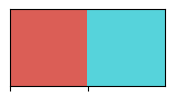

In [9]:
pal = sns.color_palette("hls", 2)

sns.palplot(pal)

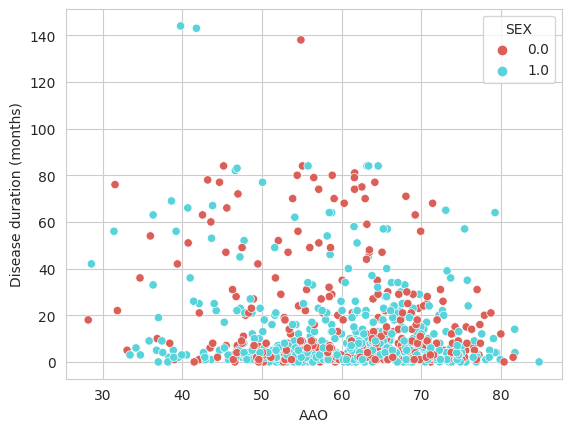

In [10]:
plot_df = ppmi_AAO_df.copy()
with sns.axes_style("whitegrid"):
    g = sns.scatterplot(x="AAO", y="Disease duration (months)", hue="SEX", data=plot_df, palette=pal)

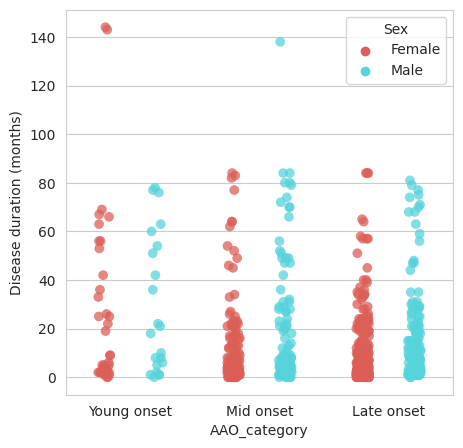

In [11]:
plot_df = ppmi_AAO_df.copy()
plot_df["AAO_category"] = plot_df["AAO_category"].replace({"(-0.001, 45.0]":"Young onset", "(45.0, 60.0]":"Mid onset", "(60.0, 100.0]":"Late onset"})
x_order = ["Young onset", "Mid onset", "Late onset"]

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(5, 5))
    g = sns.stripplot(x="AAO_category", y="Disease duration (months)", hue="Sex", order=x_order, 
     data=plot_df, palette=pal,alpha=0.75, dodge=True, size=7, ax=ax)

### NIMHANS data

In [12]:
study_data_dir = "/home/nikhil/projects/Parkinsons/nimhans/data/PD_YLO/tabular/assessments/" 
redcap_df = pd.read_csv(f"{study_data_dir}tmp_redcap_df.csv")
redcap_df.head()

,record_id,redcap_event_name,age_assessment,gender,state_domicile,education,total_duration,aao_first_mtr,type_first_mtr,current_mtr___1,...,esaps1_minor_scor,esaps_del_scor,esaps_13,pdss_score,ess_score,rbdsq_score,rls_score,stp_bng_score,gids_total,kpps_total
0,YLOPD_01,Intake,51.0,Male,West Bengal,High school,5.0,46.0,Bradykinesia,Checked,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YLOPD_02,Intake,66.0,Male,Karnataka,Graduate,6.0,60.0,Bradykinesia,Unchecked,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,10.0
2,YLOPD_03,Intake,65.0,Male,Karnataka,Primary school,9.0,56.0,Tremor,Checked,...,NaN,NaN,None,NaN,NaN,NaN,0.0,NaN,NaN,4.0
3,YLOPD_03,Follow up 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,None,104.0,1.0,2.0,0.0,2.0,3.0,3.0
4,YLOPD_04,Intake,59.0,Male,Karnataka,High school,22.0,37.0,Rigidity,Unchecked,...,Mild: Subject experiences some minor hallucina...,NaN,None,73.0,12.0,5.0,0.0,4.0,NaN,41.0


In [13]:
useful_cols = {"record_id":"PATNO","age_assessment":"AGE_AT_VISIT",
                "gender":"Sex","aao_first_mtr":"AAO","total_duration":"Disease duration"}

nimhans_AAO_df = redcap_df[redcap_df["redcap_event_name"]=="Intake"][useful_cols.keys()].copy()
nimhans_AAO_df = nimhans_AAO_df.rename(columns=useful_cols)

n_nimhans_participants = len(nimhans_AAO_df["PATNO"].unique())
print(f"Number of participants: {n_nimhans_participants}")


nimhans_AAO_df["Dx"] = nimhans_AAO_df["PATNO"].str.split("_", expand=True)[1]
nimhans_AAO_df = nimhans_AAO_df[nimhans_AAO_df["Dx"]!="HC"]
nimhans_AAO_df["AGE_AT_VISIT (months)"] = nimhans_AAO_df["AGE_AT_VISIT"] * 12.0
nimhans_AAO_df["Disease duration (months)"] = nimhans_AAO_df["Disease duration"] * 12.0
nimhans_AAO_df["AAO_category"] = pd.cut(nimhans_AAO_df["AAO"], bins=[0, 45, 60, 100], include_lowest=True)
nimhans_AAO_df["AAO_category"] = nimhans_AAO_df["AAO_category"].astype(str)
nimhans_AAO_df["dataset"] = "NIMHANS"

n_nimhans_patients = len(nimhans_AAO_df["PATNO"].unique())
print(f"Number of patients: {n_nimhans_patients}")

nimhans_AAO_df.head()

Number of participants: 272
Number of patients: 227


,PATNO,AGE_AT_VISIT,Sex,AAO,Disease duration,Dx,AGE_AT_VISIT (months),Disease duration (months),AAO_category,dataset
0,YLOPD_01,51.0,Male,46.0,5.0,01,612.0,60.0,"(45.0, 60.0]",NIMHANS
1,YLOPD_02,66.0,Male,60.0,6.0,02,792.0,72.0,"(45.0, 60.0]",NIMHANS
2,YLOPD_03,65.0,Male,56.0,9.0,03,780.0,108.0,"(45.0, 60.0]",NIMHANS
4,YLOPD_04,59.0,Male,37.0,22.0,04,708.0,264.0,"(-0.001, 45.0]",NIMHANS
6,YLOPD_05,43.0,Female,37.0,6.0,05,516.0,72.0,"(-0.001, 45.0]",NIMHANS


In [14]:
nimhans_AAO_df.groupby(["Sex","AAO_category"]).count()

PATNO  AGE_AT_VISIT  AAO  Disease duration  Dx  \
Sex    AAO_category                                                     
Female (-0.001, 45.0]     30            30   30                30  30   
       (45.0, 60.0]       23            23   23                23  23   
       (60.0, 100.0]       5             5    5                 5   5   
       nan                 1             1    0                 0   1   
Male   (-0.001, 45.0]     50            50   50                50  50   
       (45.0, 60.0]       70            70   70                69  70   
       (60.0, 100.0]      26            26   26                26  26   
       nan                 8             8    0                 0   8   

                       AGE_AT_VISIT (months)  Disease duration (months)  \
Sex    AAO_category                                                       
Female (-0.001, 45.0]                     30                         30   
       (45.0, 60.0]                       23                         23   
       (60.0, 100.0]                       5                          5   
       nan                                 1                          0   
Male   (-0.001, 45.0]                     50                         50   
       (45.0, 60.0]                       70                         69   
       (60.0, 100.0]                      26                         26   
       nan                                 8                          0   

                       dataset  
Sex    AAO_category             
Female (-0.001, 45.0]       30  
       (45.0, 60.0]         23  
       (60.0, 100.0]         5  
       nan                   1  
Male   (-0.001, 45.0]       50  
       (45.0, 60.0]         70  
       (60.0, 100.0]        26  
       nan                   8

### Merge PPMI and NIMHANS data

In [15]:
AAO_df = pd.concat([ppmi_AAO_df, nimhans_AAO_df], axis=0)
AAO_df.head()

,PATNO,EVENT_ID,Disease duration (months),AGE_AT_VISIT,AGE_AT_VISIT (months),AAO,SEX,AAO_category,Sex,dataset,Disease duration,Dx
0,3001,SC,10.0,65.1,781.2,64.266667,1.0,"(60.0, 100.0]",Female,PPMI,NaN,NaN
1,3002,SC,13.0,67.6,811.2,66.516667,0.0,"(60.0, 100.0]",Male,PPMI,NaN,NaN
2,3003,SC,24.0,56.6,679.2,54.600000,0.0,"(45.0, 60.0]",Male,PPMI,NaN,NaN
3,3006,SC,4.0,57.4,688.8,57.066667,0.0,"(45.0, 60.0]",Male,PPMI,NaN,NaN
4,3007,SC,3.0,64.5,774.0,64.250000,1.0,"(60.0, 100.0]",Female,PPMI,NaN,NaN


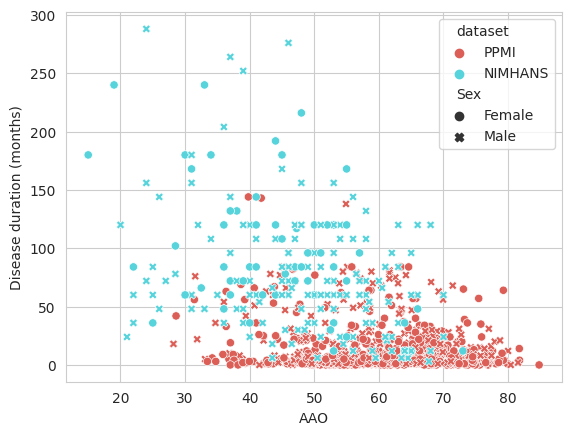

In [16]:
plot_df = AAO_df.copy()

with sns.axes_style("whitegrid"):
    g = sns.scatterplot(x="AAO", y="Disease duration (months)", hue="dataset", style="Sex", data=plot_df, palette=pal)

/home/nikhil/projects/my_venvs/napari/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


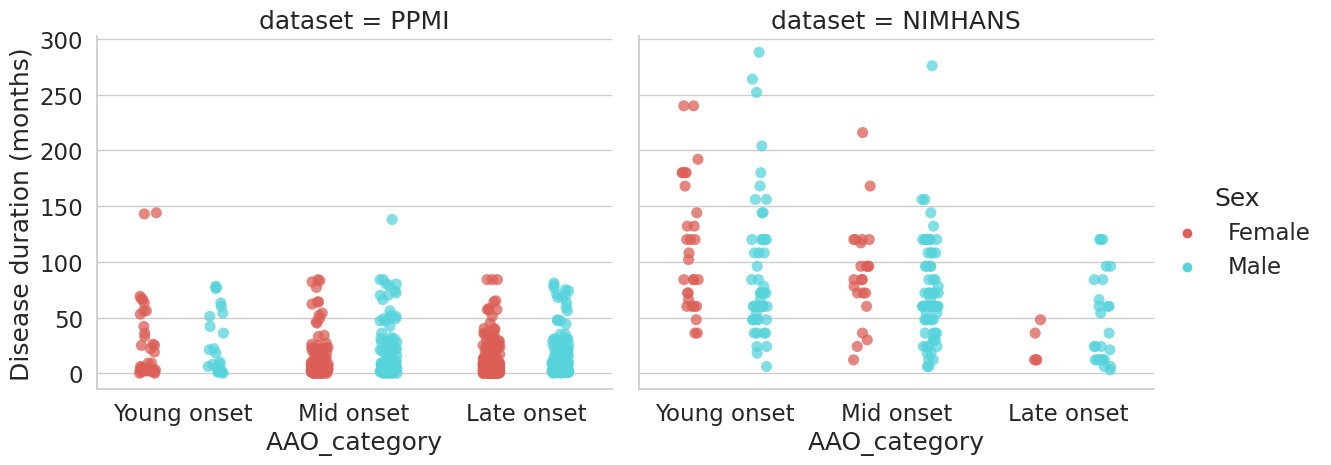

In [29]:
plot_df = AAO_df.copy().reset_index()
# plot_df = plot_df[plot_df["dataset"]=="NIMHANS"]
plot_df["AAO_category"] = plot_df["AAO_category"].replace({"(-0.001, 45.0]":"Young onset", "(45.0, 60.0]":"Mid onset", "(60.0, 100.0]":"Late onset"})
x_order = ["Young onset", "Mid onset", "Late onset"]

# with sns.axes_style("whitegrid"):
#     fig, ax = plt.subplots(figsize=(5, 5))
#     g = sns.stripplot(x="AAO_category", y="Disease duration (months)", hue="Sex", order=x_order, 
#      data=plot_df, palette=pal,alpha=0.75, dodge=True, size=7, ax=ax)

sns.set(font_scale=1.5)
with sns.axes_style("whitegrid"):
    g = sns.catplot(x="AAO_category", y="Disease duration (months)", hue="Sex", col="dataset", order=x_order, 
     data=plot_df, palette=pal, kind="strip", alpha=0.75, dodge=True, size=8, aspect=1.2)